In [1]:

#code used from machine learning proj Jan 2022
#imports included in ML
import os
import time
import sklearn
import random
import networkx as nx
import plotly.express as px
from sklearn.metrics import log_loss
from plotly.subplots import make_subplots
import matplotlib.cm as cm
from sklearn.model_selection import StratifiedKFold
from matplotlib.colors import LogNorm
import matplotlib.cm
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
from IPython.display import display, HTML 
import warnings; warnings.filterwarnings("ignore")
import warnings
from sklearn.model_selection import KFold 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,r2_score
from matplotlib import pylab
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import math
import sys
from sklearn import svm #support vector Machine
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn import metrics #accuracy measure
from sklearn.model_selection import GridSearchCV
#dataset
np.random.seed(123)
data = pd.read_excel('recruitment.xls')
lbl = LabelBinarizer()
data.replace(np.nan,0, inplace=True) 
#preprocessing

data.head()

df = data
g = df['Gender']
df = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df.rename(index = {2: "female",
                     1:"male"},inplace = True)
df.append(df.sum().rename('Total'))
dfm= data['Gender']
g= data['BAMEyn']

dfm.describe()
g.describe()

#Below are the same graphs of either count/percentage of a cross tab of variables

count    280.000000
mean       1.567857
std        0.496261
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: BAMEyn, dtype: float64

In [2]:
df = data
g = df['BAMEyn']
df = pd.concat([g.value_counts(), g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df.rename(index = {2: "BAMEy",
                     1:"BAMEn"},inplace = True)
df.append(df.sum().rename('Total'))

,counts,percentage
BAMEy,159.0,56.785714
BAMEn,121.0,43.214286
Total,280.0,100.000000


In [3]:
df = data
g = df['ShortlistedNY']
df = pd.concat([g.value_counts(), g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df.rename(index = {1: "Shortlistedy",
                     0:"Shortlistedn"},inplace = True)
df.append(df.sum().rename('Total'))

,counts,percentage
Shortlistedn,192.0,68.571429
Shortlistedy,88.0,31.428571
Total,280.0,100.000000


In [4]:
df = data
g = df['Interviewed']
df = pd.concat([g.value_counts(), g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df.rename(index = {1: "Interviewed",
                     0:"Not Interviewed"},inplace = True)
df.append(df.sum().rename('Total'))

,counts,percentage
Not Interviewed,225.0,80.357143
Interviewed,55.0,19.642857
Total,280.0,100.000000


In [5]:
df = data
g = df['FemaleONpanel']
df = pd.concat([g.value_counts(), g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df.rename(index = {1: "Male Only",
                     2:"Female Panel member"},inplace = True)
df.append(df.sum().rename('Total'))

,counts,percentage
0.0,225.0,80.357143
Male Only,33.0,11.785714
Female Panel member,22.0,7.857143
Total,280.0,100.000000


In [6]:
df = data
g = data['OfferNY']
df = pd.concat([g.value_counts(), g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df.rename(index = {1: "OfferY",
                     0:"OfferN"},inplace = True)
df.append(df.sum().rename('Total'))

,counts,percentage
OfferN,252.0,90.0
OfferY,28.0,10.0
Total,280.0,100.0


In [7]:
df = data
g = df['AcceptNY']
df = pd.concat([g.value_counts(), g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df.rename(index = {1: "AcceptY",
                     0:"AcceptN"},inplace = True)
df.append(df.sum().rename('Total'))

,counts,percentage
AcceptN,262.0,93.571429
AcceptY,18.0,6.428571
Total,280.0,100.000000


In [8]:
df = data
g = df['JoinYN']
df = pd.concat([g.value_counts(), g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df.rename(index = {1: "JoinY",
                     0:"JoinN"},inplace = True)
df.append(df.sum().rename('Total'))

,counts,percentage
JoinN,262.0,93.571429
JoinY,18.0,6.428571
Total,280.0,100.000000


In [9]:
chisqt = pd.crosstab(data.Gender, data.ShortlistedNY, margins=True)
chisqt.head()

ShortlistedNY,0,1,All
Gender,,,
1,40,38,78
2,152,50,202
All,192,88,280


In [10]:
chisqt = pd.crosstab(data.Gender, data.OfferNY, margins=True)
chisqt.head()

OfferNY,0.0,1.0,All
Gender,,,
1,60,18,78
2,192,10,202
All,252,28,280


In [11]:
chisqt = pd.crosstab(data.BAMEyn, data.ShortlistedNY, margins=True)
chisqt.head()

ShortlistedNY,0,1,All
BAMEyn,,,
1,102,19,121
2,90,69,159
All,192,88,280


In [12]:
chisqt = pd.crosstab(data.BAMEyn, data.OfferNY, margins=True)
chisqt.head()

OfferNY,0.0,1.0,All
BAMEyn,,,
1,113,8,121
2,139,20,159
All,252,28,280


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ApplicantCode  280 non-null    int64  
 1   Gender         280 non-null    int64  
 2   BAMEyn         280 non-null    int64  
 3   ShortlistedNY  280 non-null    int64  
 4   Interviewed    280 non-null    int64  
 5   FemaleONpanel  280 non-null    float64
 6   OfferNY        280 non-null    float64
 7   AcceptNY       280 non-null    float64
 8   JoinYN         280 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 19.8 KB


In [23]:
df = data
df.groupby(['Gender']).size().reset_index(name='count')
g = df.groupby('Gender')
df = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('count','percentage'))



In [15]:
#outputting different counts men/women
df = data
g = df[df['Gender'] == 2].ShortlistedNY
df = pd.concat([g.value_counts(), g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df.rename(index = {1: "ShortlistedY",
                     0:"ShortlistedN"},inplace = True)
df.append(df.sum().rename('Total'))
df = data
g = df[df['Gender'] == 1].ShortlistedNY
df = pd.concat([g.value_counts(), g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df.rename(index = {1: "ShortlistedY",
                     0:"ShortlistedN"},inplace = True)
df.append(df.sum().rename('Total'))


,counts,percentage
ShortlistedN,40.0,51.282051
ShortlistedY,38.0,48.717949
Total,78.0,100.000000


In [16]:
#chi squared for gender
from scipy.stats import chi2_contingency 
data.replace(np.nan,0, inplace=True) 
chisqt = pd.crosstab(data.Gender, data.ShortlistedNY, margins=True)
print(chisqt)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
stat, p,dof = chi2_contingency(value)[0:3]
print(chi2_contingency(value,correction=False)[0:3])
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

ShortlistedNY    0   1  All
Gender                     
1               40  38   78
2              152  50  202
All            192  88  280
(14.996576580734997, 0.0005540319007090444, 2)
p value: 0.0005540319007090444
Reject NULL HYPOTHESIS


In [17]:
#chi squared for bame
from scipy.stats import chi2_contingency 
data.replace(np.nan,0, inplace=True) 
chisqt = pd.crosstab(data.BAMEyn, data.ShortlistedNY, margins=True)
print(chisqt)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
stat, p,dof = chi2_contingency(value,correction=False)[0:3]
significance_level = 0.05
print(chi2_contingency(value)[0:3])
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

ShortlistedNY    0   1  All
BAMEyn                     
1              102  19  121
2               90  69  159
All            192  88  280
(24.452319861644675, 4.900565600564995e-06, 2)
p value: 4.900565600564995e-06
Reject NULL HYPOTHESIS


In [18]:
#train test split

data = pd.read_excel('recruitment.xls')
#data.replace(-1, np.nan, inplace=True)
data.replace(np.nan,0, inplace=True)
#data = data.dropna()
#data['Gender'] = lbl.fit_transform(data['Gender']).flatten()
X = data.drop(["ApplicantCode","OfferNY","AcceptNY","JoinYN"], axis=1)
Y = data["OfferNY"]

X.head()

Y.head()


x_train, x_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.7, test_size=0.3, random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#algorithms

# **Logistic Regression model**

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_test,y_pred),8)))

#classification report
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

So, Our accuracy Score is: 0.92857143
Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        77
         1.0       0.54      1.00      0.70         7

    accuracy                           0.93        84
   macro avg       0.77      0.96      0.83        84
weighted avg       0.96      0.93      0.94        84

Confusion matrix:
 [[71  6]
 [ 0  7]]


0.9232142857142858
{'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l2'}
LogisticRegression(C=0.23357214690901212)
Cross Validation Accuracies:
-------------------------
[0.9285714285714286, 0.9107142857142857, 0.9285714285714286, 0.9285714285714286, 0.9107142857142857, 0.9107142857142857, 0.9285714285714286, 0.9285714285714286, 0.9464285714285714, 0.9285714285714286]

Mean Cross Validation Accuracy:
-------------------------
0.925

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.010714285714285721 (High Variance)

Training Accuracy:
---------------
0.9357142857142857




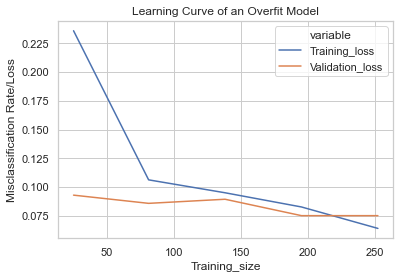

So, Our accuracy Score is: 0.92857143
Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        77
         1.0       0.54      1.00      0.70         7

    accuracy                           0.93        84
   macro avg       0.77      0.96      0.83        84
weighted avg       0.96      0.93      0.94        84

Confusion matrix:
 [[71  6]
 [ 0  7]]
Disparate Impact, Gender vs. Offer: 0.07070143634081719
58


In [20]:
from collections import Counter
#fariness notion function
def demographic_parity(y_pred):
    counts = Counter(y_pred)
    priviliged = counts[0]
    all_priviliged = priviliged/78

    unpriviliged = counts[1]
    all_unpriviliged = unpriviliged/202

    return abs(priviliged - unpriviliged) #later take absolute diff - but we want to show females predicted more toxic than male

kfold = KFold(n_splits=10, random_state=22,shuffle = True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression']


from sklearn.pipeline import Pipeline
#hyperparameter tuning

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]

cv = StratifiedShuffleSplit(n_splits = 10, test_size = .2)

param =  {'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 20),
    'max_iter' : [100, 1000,2500, 5000]
    }
logreg = LogisticRegression(solver='liblinear')
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
grid.fit(X, Y)
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

#graph for hyperparameter tuning. Changed based on before/after
def learn_curve(X,y,c):
    sc = StandardScaler() # Scaling the input features
    

    # Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
    lr = Pipeline(steps=(['scaler',sc],
                        ['classifier',LogisticRegression(C=0.23357214690901212,max_iter=100) ]))
    
    
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
    lr.fit(X,y)
    train_score = lr.score(X,y)
    train_size,train_scores,test_scores = sklearn.model_selection.learning_curve(estimator=lr,X=X,y=Y,cv=kfold,scoring="accuracy",random_state=0)
    train_scores = 1-np.mean(train_scores,axis=1)
    test_scores = 1-np.mean(test_scores,axis=1)
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    return {"cv_scores":cv_scores,
           "train_score":train_score,
           "learning_curve":lc}
lc = learn_curve(X,Y,31)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])} (High Variance)\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of an Overfit Model")
plt.ylabel("Misclassification Rate/Loss");
plt.show()
#LR
logreg = LogisticRegression(C=0.23357214690901212,max_iter=100)

logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_test,y_pred),8)))
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

#function for outputting statistical disparity
def statistical_disparity(y_pred):
    from collections import Counter
    num_of_priviliged = 78
    num_of_unpriviliged = 202
    counts = Counter(y_pred)
    unpriviliged_outcomes = counts[1]
    unpriviliged_ratio = unpriviliged_outcomes/num_of_unpriviliged
    unpriviliged_ratio
    priviliged_outcomes = counts[0]
    priviliged_ratio = priviliged_outcomes/num_of_priviliged
    priviliged_ratio
    # Calculating disparate impact
    disparate_impact = unpriviliged_ratio / priviliged_ratio
    if disparate_impact > 1:
        disparate_impact = 1/disparate_impact
    return("Disparate Impact, Gender vs. Offer: " + str(disparate_impact))
print(statistical_disparity(y_pred))
print(demographic_parity(y_pred))


In [21]:
#mitigating bias using adversarial learning
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
data = pd.read_excel('recruitment.xls')
#data.replace(-1, np.nan, inplace=True)
data.replace(np.nan,0, inplace=True)
#data = data.dropna()
#data['Gender'] = lbl.fit_transform(data['Gender']).flatten()
X = data.drop(["ApplicantCode","OfferNY","AcceptNY","JoinYN"], axis=1)
Y = data["OfferNY"]
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.7, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
# Liblinear is a solver that is very fast for small datasets, like ours 
model = LogisticRegression(solver='liblinear', class_weight='balanced')
import aif360
from aif360.algorithms.preprocessing import DisparateImpactRemover
binaryLabelDataset = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=data,
    label_names=['OfferNY'],
    protected_attribute_names=['Gender'])
di = DisparateImpactRemover(repair_level = 1.0)
dataset_transf_train = di.fit_transform(binaryLabelDataset)
transformed = dataset_transf_train.convert_to_dataframe()[0]
x_trans = transformed.drop(["ApplicantCode","OfferNY","AcceptNY","JoinYN"], axis = 1)
y = transformed['OfferNY']
scaler = StandardScaler()
data_std = scaler.fit_transform(x_trans)
x_trans_train,x_trans_test,y_trans_train,y_trans_test = train_test_split(x_trans, y, test_size=0.3, random_state = 0)

logreg = model.fit(x_trans_train, y_trans_train)
y_pred = logreg.predict(x_trans_test)

from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_trans_test, y_pred))
conf_mat = confusion_matrix(y_true=y_trans_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
print(statistical_disparity(y_pred))
print(demographic_parity(y_pred))

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        77
         1.0       0.47      1.00      0.64         7

    accuracy                           0.90        84
   macro avg       0.73      0.95      0.79        84
weighted avg       0.96      0.90      0.92        84

Confusion matrix:
 [[69  8]
 [ 0  7]]
Disparate Impact, Gender vs. Offer: 0.0839431769263883
54


In [22]:
#references for code
#https://sklearn.org - provides majority of general info
#https://www.kaggle.com/ksvmuralidhar/learning-curve-to-identify-overfit-underfit
#https://arxiv.org/pdf/1801.07593.pdf
#https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
#https://github.com/bryantruong/examingBiasInAI/blob/main/biasInMachineLearning.ipynb
#[1]	Mitigating Bias in AI with AIF360 | by Bryan Truong | Towards Data Science